In [1]:
from matplotlib import pyplot as plt

import src.neural_network as nn
from src.utils import load_mnist

In [2]:
X_dev, Y_dev, X_train, Y_train = load_mnist('data/mnist.csv')

In [3]:
n_layers      = 2
n_classes     = 10
hidden_units  = 128
alpha         = 0.001
keep_prob     = 1.0
epochs        = 50

params, accuracies, losses = nn.train(X_train, Y_train, hidden_units, n_classes, alpha, epochs, n_layers, keep_prob)

Epoch 0: Train Accuracy = 0.107 |  Train Loss = 3.200 | Best Accuracy = 0.107
Epoch 10: Train Accuracy = 0.766 |  Train Loss = 0.752 | Best Accuracy = 0.766
Epoch 20: Train Accuracy = 0.862 |  Train Loss = 0.456 | Best Accuracy = 0.862
Epoch 30: Train Accuracy = 0.892 |  Train Loss = 0.362 | Best Accuracy = 0.892
Epoch 40: Train Accuracy = 0.910 |  Train Loss = 0.308 | Best Accuracy = 0.910
Epoch 49: Train Accuracy = 0.921 |  Train Loss = 0.275 | Best Accuracy = 0.921


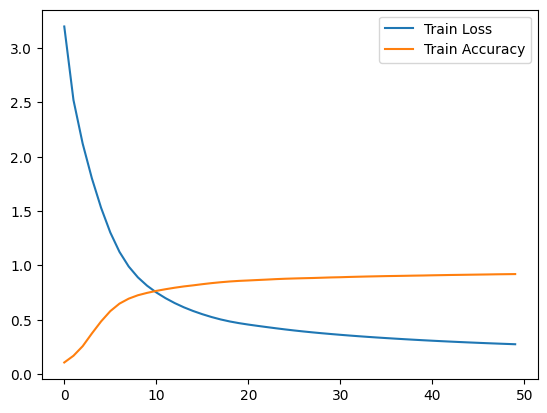

In [5]:
plt.plot(losses, label='Train Loss')
plt.plot(accuracies, label='Train Accuracy')
plt.legend()
plt.show()

In [5]:
def make_predictions(X, params, n_layers, keep_prob):
  _, A_i, _ = nn.forward_prop(params, n_layers, X, keep_prob, training=False)
  predictions = nn.get_predictions(A_i[-1])
  return predictions

def test_prediction(index, params, n_layers, keep_prob):
  current_image = X_train[:, index, None]
  prediction = make_predictions(X_train[:, index, None], params, n_layers, keep_prob)
  label = Y_train[index]
  print("Prediction: ", prediction)
  print("Label: ", label)
  
  current_image = current_image.reshape((28, 28)) * 255
  plt.gray()
  plt.imshow(current_image, interpolation='nearest')
  plt.show()

Prediction:  [7]
Label:  7


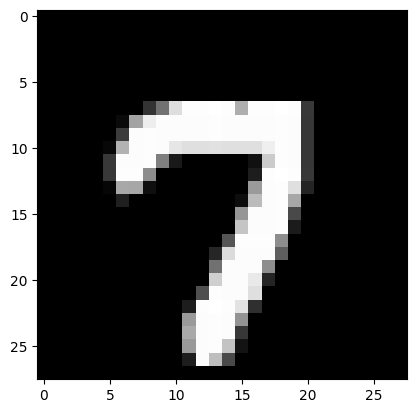

Prediction:  [1]
Label:  1


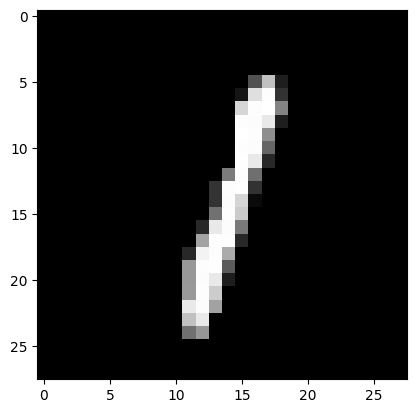

Prediction:  [6]
Label:  6


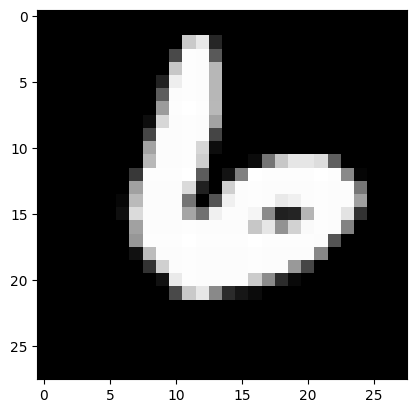

Prediction:  [2]
Label:  2


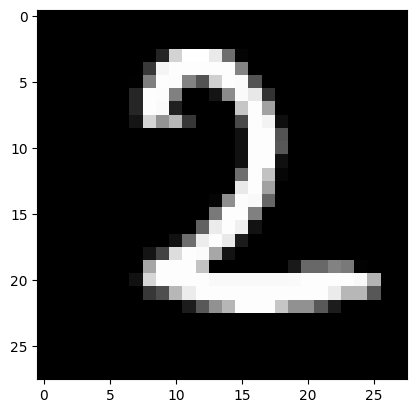

In [6]:
test_prediction(0, params, n_layers, keep_prob)
test_prediction(1, params, n_layers, keep_prob)
test_prediction(2, params, n_layers, keep_prob)
test_prediction(3, params, n_layers, keep_prob)

In [7]:
dev_predictions = make_predictions(X_dev, params, n_layers, keep_prob)
nn.get_accuracy(dev_predictions, Y_dev)

np.float64(0.92)